<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/onda_cuadrada_filtrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado de una onda cuadrada

En clase mediremos la salida a un circuito pasabajos RC al entrar con una onda cuadrada de 1 kHz. En este notebook analizaremos esa salida matemáticamente descomponiendo la entrada como serie de Fourier.

Para empezar generamos una onda cuadrada en python.

 



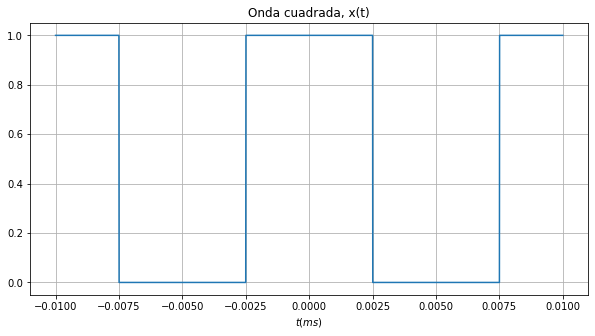

In [292]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import warnings

plt.rcParams["figure.figsize"] = (10, 5)

warnings.filterwarnings('ignore')

t = np.linspace(-.01, .01, 5000)
T = 0.01
w0 = 2 * np.pi / T

x = signal.square((t + 0.25 * T) * 2 * np.pi / T, 0.5) / 2 + 1 / 2

plt.figure(figsize=(10, 5))
plt.plot(t, x)
plt.title('Onda cuadrada, x(t)')
plt.xlabel(r'$t(ms)$')
plt.show
plt.grid()

Salvo en los puntos de discontinuidad, esta onda cuadrada de período $T=1 ms$ puede descomponerse como

$$x(t)=\sum_{k \in \mathbb Z} a_k e^{j2\pi t/T} =\sum_{k \in \mathbb Z} a_k e^{j2\pi t/0.001}=\sum_{k \in \mathbb Z} a_k e^{j2000\pi t}$$

con $a_0=1/2$ pues esa es su media o componente DC, y para $k\neq 0$ 

$$a_k=\frac{\sin(\pi k)}{\pi k}$$

lo cual comprobamos a continuación.

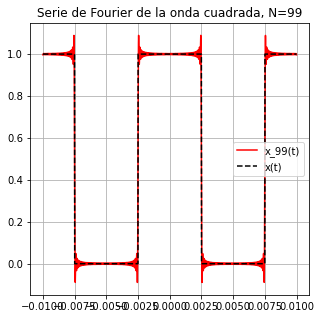

In [311]:
K = 99
kCoeff = 2 * K + 1
a0 = 0.5
z = a0
for k in range(1, K + 1):
    a_k = np.sin(np.pi * k / 2) / (k * np.pi)
    z = z + a_k * np.exp(1j * 2 * np.pi * k * t / T)
    z = z + a_k * np.exp(-1j * 2 * np.pi * k * t / T)
#     print("a%d = %6.3f" % (k, a_k))

plt.figure(figsize=(5,5))
plt.plot(t, np.real(z), '-r', label='x_%d(t)' % K)
plt.plot(t, x, '--k', label='x(t)')
plt.title("Serie de Fourier de la onda cuadrada, N=%d" % K)
plt.legend()
plt.grid()

Luego cada exponencial $e^{j 2 k\pi t/T}$ al pasar por el filtro RC queda multiplicada por su transferencia 

$$H(s)=\frac{1}{RC}\frac{1}{s+\frac{1}{RC}}$$

evaluada en $$jk \omega_0 = jk\frac{2\pi}{T}$$

es decir 

$$H_k:= H(jk 2\pi/T)=\frac{1}{RC} \left(\frac{1}{\frac{j k2\pi}{T} +\frac{1}{RC}}\right)$$

Entonces por linealidad la salida es

$$y(t)=\sum_{k \in \mathbb Z} a_k H_k e^{j2\pi t/T}=\sum_{k \in \mathbb Z} b_k  e^{j2\pi t/T}$$

con $b_0=1/2$ pues la transferencia DC es $H_0=1$,  y para $k\neq 0$

$$b_k=H_k a_k= \frac{1}{RC} \left(\frac{1}{\frac{j k2\pi}{T} +\frac{1}{RC}}\right) \sin(\pi k)/\pi k$$

lo cual graficado queda de la siguiente manera



ω_RC = 1666.67 Hz


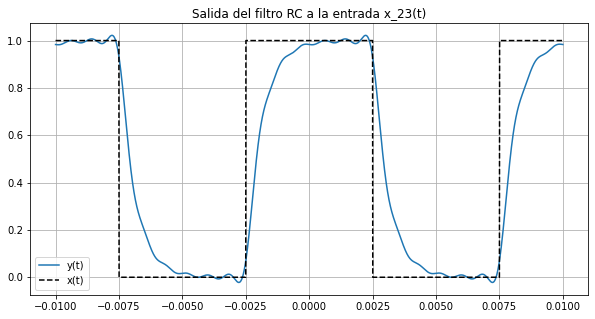

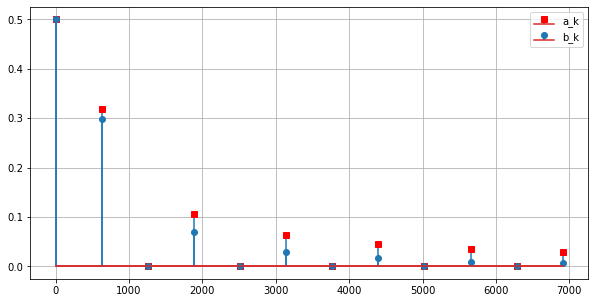

In [294]:
R = 12e3
C = 5e-8
tau = R * C
wRC = 1 / tau

ws = np.linspace(0, K * w0, K + 1)
w = np.linspace(0, K * w0, 3000)

print('ω_RC = %.2f Hz' % wRC)

ks = range(0, K + 1)
aes = [1 / 2] * (K + 1)
bes = [1 / 2] * (K + 1)

yRC = 0.5
for k in range(1, K + 1):
    a_k = np.sin(np.pi * k / 2) / (k * np.pi)
    H_k = 1 / (R * C) * 1 / (1j * k * 2 * np.pi / T + 1 / (R * C))
    b_k = a_k * H_k
    kneg = -k
    a_kneg = np.sin(np.pi * kneg / 2) / (kneg * np.pi)
    H_kneg = 1 / (R * C) * 1 / (1j * kneg * 2 * np.pi / T + 1 / (R * C))
    b_kneg = a_kneg * H_kneg
    aes[k] = np.abs(a_k)
    bes[k] = np.abs(b_k)
    yRC = yRC + b_k * np.exp(1j * 2 * np.pi * k * t / T)
    yRC = yRC + b_kneg * np.exp(1j * 2 * np.pi * kneg * t / T)

plt.figure()
plt.plot(t, np.real(yRC), label='y(t)')
plt.plot(t, x, '--k', label='x(t)')
plt.title("Salida del filtro RC a la entrada x_%d(t)" % kCoeff)
plt.legend()
plt.grid()

plt.figure()
plt.stem(ws, aes, markerfmt='rs', label='a_k')
plt.stem(ws, bes, label='b_k')
# plt.stem(aes, markerfmt='rD', label='a_k')
# plt.stem(bes, label='b_k')
plt.legend()
plt.grid()

Se puede observar el ejecto pasabajos del filtro RC, en que las componentes de alta frecuancia son atenuadas. Esa atenuación se evidencia si comparamos la amplitud de los coeficientes $a_k$ de la entrada $x(t)$ y $b_k$ de la salida $y(t)$ en la figura anterior.

La respuesta en frecuencia de este filtro es $$H_{RC} = \frac{1}{RC}\frac{1}{j\omega+\frac{1}{RC}}.$$ La gráfica en frecuencia $\omega$ (el espectro) queda como en la siguiente figura.

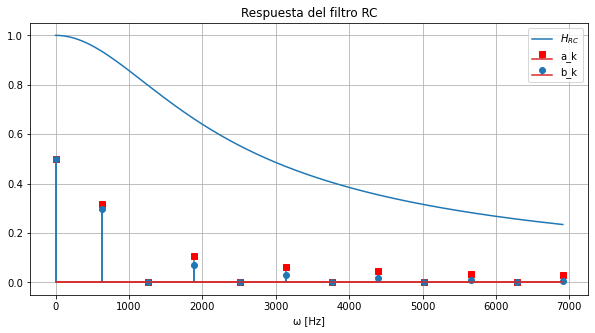

In [295]:
HRC = wRC / np.abs(1j*w + wRC)

plt.figure()
plt.plot(w,HRC, label="$H_{RC}$")
plt.stem(ws, aes, markerfmt='rs', label='a_k')
plt.stem(ws, bes, label='b_k')
plt.xlabel("ω [Hz]")
plt.title("Respuesta del filtro RC")
plt.legend()
plt.grid()

# Filtro pasabajos ideal

El filtro RC es un filtro pasabajos real, es decir atenúa en mayor cantidad las altas frecuencias por lo tanto "pasan" más las bajas frecuencias. El siguiente es un filtro pasabajos "ideal" (pues no puede ser implementado de forma causal con una respuesta al impulso) que no afecta las frecuencias has $\omega_c$ y anula todas las frecuencias mayores a $\omega_c$.

ω0 = 628.32 Hz
ωC = 7100.00 Hz
ω1 = 628.32 Hz
ω2 = 1256.64 Hz
ω3 = 1884.96 Hz
ω4 = 2513.27 Hz
ω5 = 3141.59 Hz
ω6 = 3769.91 Hz
ω7 = 4398.23 Hz
ω8 = 5026.55 Hz
ω9 = 5654.87 Hz
ω10 = 6283.19 Hz
ω11 = 6911.50 Hz


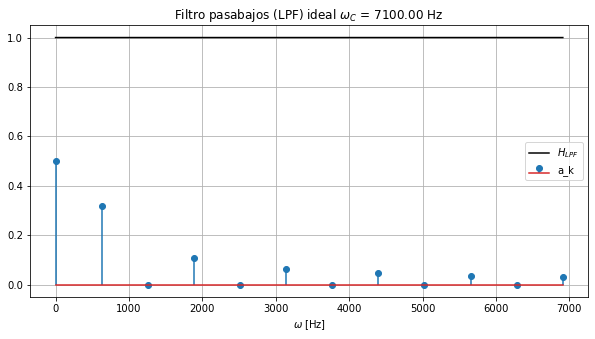

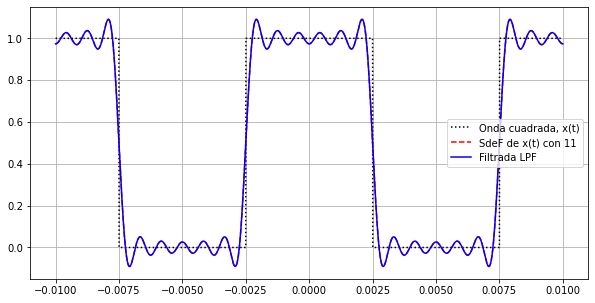

In [301]:
tau = R * C
kLP = 3.1
wC = kLP * w0
wC = 7100
print("ω0 = %.2f Hz" % w0)
print("ωC = %.2f Hz" % wC)
y = 0.5

# w = np.linspace(-K * w0, K * w0, 3000)
H_LP = np.sign(wC - np.abs(w)) / 2 + 0.5
plt.figure()
plt.stem(ws, aes, label='a_k')
plt.plot(w, H_LP, "-k", label="$H_{LPF}$")
plt.xlabel("$\omega$ [Hz]")
plt.title("Filtro pasabajos (LPF) ideal $\omega_C$ = %.2f Hz" % wC)
# plt.legend()
# plt.grid()

# plt.figure()
plt.legend()
plt.grid()

for k in range(1, K + 1):
    wk = w0 * k
    print("ω%d = %.2f Hz" % (k, wk))
    if (wk < wC):
        y_k = np.sin(np.pi * k / 2) / (k * np.pi)
        kneg = -k
        y_kneg = np.sin(np.pi * kneg / 2) / (kneg * np.pi)
        y = y + y_k * np.exp(1j * 2 * np.pi * k * t / T)
        y = y + y_kneg * np.exp(1j * 2 * np.pi * kneg * t / T)

plt.figure()
plt.plot(t, np.real(x), ":k", label="Onda cuadrada, x(t)")
plt.plot(t, np.real(z), "--r", label="SdeF de x(t) con %d" % K)
plt.plot(t, np.real(y), "-b", label="Filtrada LPF")
plt.legend()
plt.grid()